# Profiler performance

We use the part of the instacart data that you can find here https://www.instacart.com/datasets/grocery-shopping-2017

Specically order_products__prior.csv a 4 columns, 33.2 Million rows csv file.

It took 355.58 seconds to process all the data set in a Windows 10, 
Instacart data



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
# Create optimus
from optimus import Optimus
op = Optimus(master="local[*]", app_name = "optimus" ,verbose =True, checkpoint= True)

Just check that Spark and all necessary environments vars are present...
-----
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
HADOOP_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
You don't have PYSPARK_PYTHON set
You don't have PYSPARK_DRIVER_PYTHON set
JAVA_HOME=C:\Program Files\Java\jdk1.8.0_181
Pyarrow Installed
-----
Starting or getting SparkSession and SparkContext...

                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
Transform and Roll out...
Setting checkpoint folder local. If you are in a cluster initialize Optimus with master='your_ip' as param
Deleting previous folder if exists...
Creating the

### Benchmark 

In [4]:
df = op.load.csv("C:\\Users\\argenisleon\\Desktop\\order_products__prior.csv")

In [5]:
df.table()

order_id 1 (int) nullable,product_id 2 (int) nullable,add_to_cart_order 3 (int) nullable,reordered 4 (int) nullable
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1
2,40141,7,1
2,1819,8,1
2,43668,9,0
3,33754,1,1


Processing column 'order_id'...
_count_data_types() executed in 18.69 sec
count_data_types() executed in 18.69 sec
cast_columns() executed in 0.01 sec
_exprs() executed in 16.04 sec
general_stats() executed in 16.05 sec
------------------------------
Processing column 'order_id'...
frequency() executed in 23.65 sec
stats_by_column() executed in 8.83 sec
percentile() executed in 12.21 sec
extra_numeric_stats() executed in 37.45 sec
bucketizer() executed in 0.29 sec
hist() executed in 14.6 sec
dataset_info() executed in 22.43 sec


Number of columns,4
Number of rows,32434489
Total Missing (%),0.0%
Total size in memory,188.4 MB
String,0
Numeric,1
Date,0
Bool,0
Array,0
Not available,0
Unique,3025302

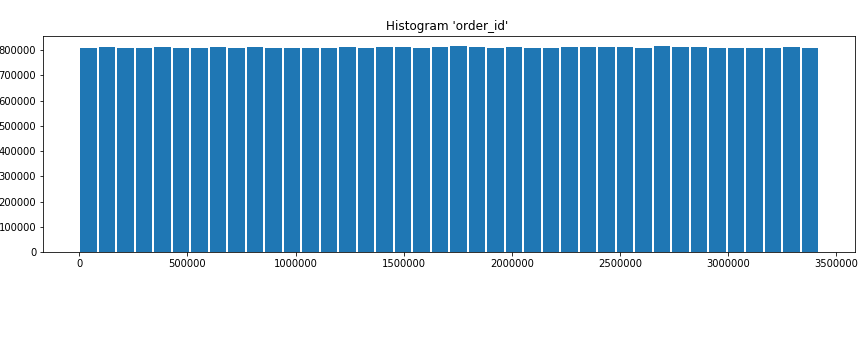
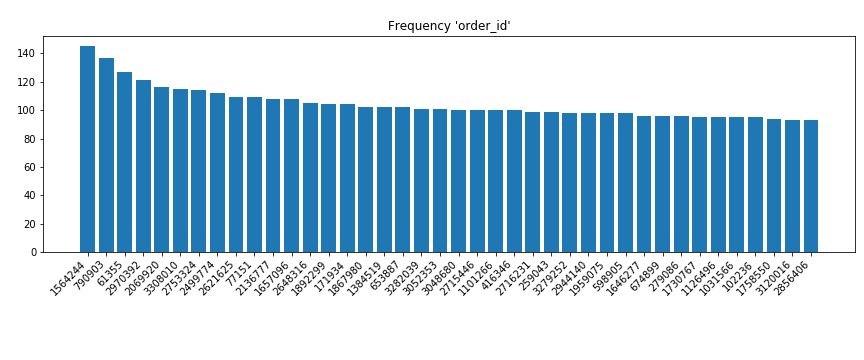

run() executed in 186.8 sec


In [10]:
op.profiler.run(df, "order_id", infer=False, relative_error=1)

Processing column 'order_id'...
_count_data_types() executed in 21.72 sec
count_data_types() executed in 21.72 sec
cast_columns() executed in 0.01 sec
_exprs() executed in 17.72 sec
general_stats() executed in 17.73 sec
------------------------------
Processing column 'order_id'...
frequency() executed in 25.8 sec
stats_by_column() executed in 9.99 sec
percentile() executed in 13.46 sec
extra_numeric_stats() executed in 39.63 sec
bucketizer() executed in 0.3 sec
hist() executed in 14.25 sec
dataset_info() executed in 22.55 sec


Number of columns,4
Number of rows,32434489
Total Missing (%),0.0%
Total size in memory,8.3 MB
String,0
Numeric,1
Date,0
Bool,0
Array,0
Not available,0
Unique,3025302

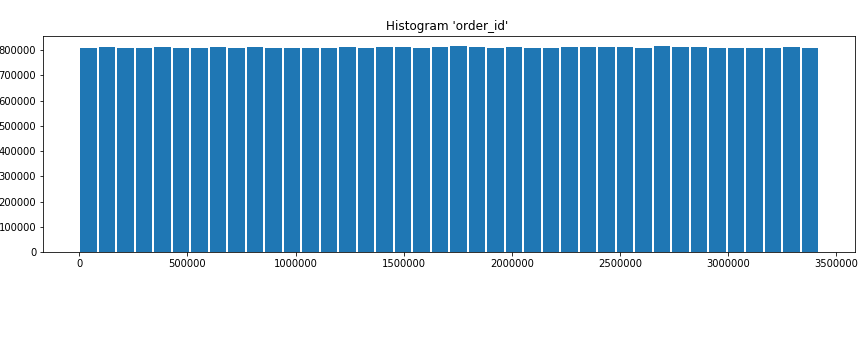
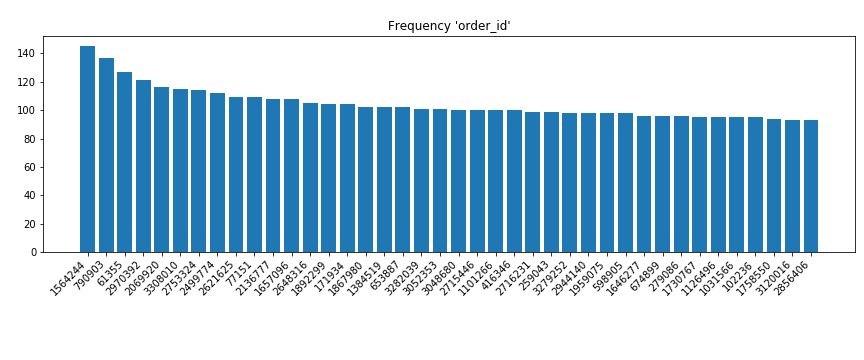

run() executed in 199.09 sec


In [11]:
op.profiler.run(df, "order_id", infer=True, relative_error=1)